#### z검정
: 모집단의 분산을 알고 있을 때, 모집단의 평균에 대한 가설을 검정하는데 사용합니다.

#### 일표본 t검정
: 모집단의 분산을 모를 때, 모집단의 평균에 대한 가설을 검정하는데 사용합니다.

#### 단일표본 t검정
: 모집단의 분산을 모를 때, 모집단의 평균이 기준값과 같은지 검정하는데 사용합니다.

#### 대응표본 t검정
: 두 개의 짝을 이룬 표본의 차이에 대한 평균값이 0인지 검정하는데 사용합니다.(두 표본이 같은지 아닌지)

#### 독립표본 t검정
: 두 개의 독립된 표본의 평균이 같은지 검정하는데 사용합니다.

#### 양측 t검정
: 검정 대상인 모집단 평균이 두 개 이상의 값일 수 있으며, 가설을 양측으로 설정하여 검정하는데 사용합니다.

#### 단측 t검정
: 검정 대상인 모집단 평균이 특정 방향으로만 편향될 가능성이 있는 경우, 가설을 한쪽 방향으로 설정하여 검정하는데 사용합니다.

#### 카이제곱검정
: 변수 간의 연관성이 있는지 검정하는데 사용합니다. 일반적으로는 분할표 형태로 제공되며, 두 변수 간의 관계를 검정하여 유의한 차이가 있는지 확인합니다.





In [71]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
from numpy import random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

## 통계적 가설검정이란
모집단의 모수에 관하여 두가지 가설을 세우고 표본으로부터 계산되는 통계량을 이용하여 어느 가설이 옳은지 판단하는 통계적인 방법
- 검정통계량(t/z-value) vs 임곗값
- p값 vs 유의수준

## 통계적 가설검정이란
모집단의 모수에 관하여 두가지 가설을 세우고 표본으로부터 계산되는 통계량을 이용하여 어느 가설이 옳은지 판단하는 통계적인 방법
- 검정통계량 vs 임곗값
- p값 vs 유의수준
통계적 가설 검정은, 모집단의 특성에 대한 가설을 세우고, 이 가설이 옳은지 여부를 검정하는 과정입니다. 이 과정에서는 표본 데이터를 이용하여 모집단의 특성을 추정하고, 추정한 결과를 바탕으로 가설을 세우고 검정합니다.

- 가설 검정에서는 대개 두 개의 가설을 세웁니다. 이 중에서 귀무가설(null hypothesis)은 일반적으로 채택되어져 있는 가설로, 이를 기각하기 위해서는 통계적으로 유의한 증거가 필요합니다. 대립가설(alternative hypothesis)은 귀무가설과 반대되는 가설로, 이 가설이 옳은지 검정하는 것이 목적입니다.

- 가설 검정에서는 먼저, 검정통계량(test statistic)을 계산합니다. 검정통계량은 표본 데이터를 이용하여 계산되는 통계량으로, 이를 통해 귀무가설이 맞는지 여부를 판단합니다. 검정통계량의 값이 특정 기준값(각 임계치)보다 작으면(or 크면), 귀무가설을 기각할 수 있습니다. 이 기준값은 보통 유의수준(significance level)이라고 불리며, 보통 0.05나 0.01로 설정됩니다. 이러한 유의수준은 귀무가설을 잘못 기각할 확률을 의미합니다.

- 가설 검정에서는 또한, 검정통계량의 분포를 이용하여 p값(p-value)을 계산합니다. p값은 귀무가설이 옳은데도 불구하고, 검정통계량이 현재 값 이상이 나올 확률을 의미합니다. 만약 p값이 유의수준보다 작으면, 귀무가설을 기각할 수 있습니다. 반대로, p값이 유의수준보다 크다면, 귀무가설을 기각할 수 없습니다.

- 가설 검정은 통계학에서 매우 중요한 개념 중 하나로, 데이터 분석의 근간을 이루는 기술 중 하나입니다. 특히, 가설 검정은 과학적인 사실을 검증하고, 의사결정을 하기 위해 필요한 중요한 도구입니다.

## 통계적 가설검정이란
모집단의 모수에 관하여 두가지 가설을 세우고 표본으로부터 계산되는 통계량을 이용하여 어느 가설이 옳은지 판단하는 통계적인 방법
- 검정통계량 vs 임곗값
- p값 vs 유의수준
통계적 가설 검정은, 모집단의 특성에 대한 가설을 세우고, 이 가설이 옳은지 여부를 검정하는 과정입니다. 이 과정에서는 표본 데이터를 이용하여 모집단의 특성을 추정하고, 추정한 결과를 바탕으로 가설을 세우고 검정합니다.

- 가설 검정에서는 대개 두 개의 가설을 세웁니다. 이 중에서 귀무가설(null hypothesis)은 일반적으로 채택되어져 있는 가설로, 이를 기각하기 위해서는 통계적으로 유의한 증거가 필요합니다. 대립가설(alternative hypothesis)은 귀무가설과 반대되는 가설로, 이 가설이 옳은지 검정하는 것이 목적입니다.

- 가설 검정에서는 먼저, 검정통계량(test statistic)을 계산합니다. 검정통계량은 표본 데이터를 이용하여 계산되는 통계량으로, 이를 통해 귀무가설이 맞는지 여부를 판단합니다. 검정통계량의 값이 특정 기준값보다 작으면, 귀무가설을 기각할 수 있습니다. 이 기준값은 보통 유의수준(significance level)이라고 불리며, 보통 0.05나 0.01로 설정됩니다. 이러한 유의수준은 귀무가설을 잘못 기각할 확률을 의미합니다.

- 가설 검정에서는 또한, 검정통계량의 분포를 이용하여 p값(p-value)을 계산합니다. p값은 귀무가설이 옳은데도 불구하고, 검정통계량이 현재 값 이상이 나올 확률을 의미합니다. 만약 p값이 유의수준보다 작으면, 귀무가설을 기각할 수 있습니다. 반대로, p값이 유의수준보다 크다면, 귀무가설을 기각할 수 없습니다.

- 가설 검정은 통계학에서 매우 중요한 개념 중 하나로, 데이터 분석의 근간을 이루는 기술 중 하나입니다. 특히, 가설 검정은 과학적인 사실을 검증하고, 의사결정을 하기 위해 필요한 중요한 도구입니다.
#### z-검정 vs t-검정
- z-검정은 모집단의 분산이 알려져 있을 때 사용할 수 있는 검정 방법입니다. 예를 들어, 어떤 특성에 대한 모집단 분포가 정규분포를 따른다는 가정하에, 표본의 평균을 이용하여 모집단 평균을 추론하는 경우에 사용됩니다. 이때 표본 크기가 충분히 크다면, 중심극한정리에 따라 표본평균이 정규분포를 따르기 때문에 z-검정을 사용할 수 있습니다. z-검정은 검정통계량으로 z-score(표준정규분포 상에서의 위치)를 사용하며, z-score가 임계치보다 큰지 여부로 가설검정을 수행합니다.

- t-검정은 모집단의 분산이 알려져 있지 않을 때 사용할 수 있는 검정 방법입니다. 예를 들어, 표본의 크기가 작거나 모집단이 정규분포를 따르지 않는 경우 t-검정을 사용할 수 있습니다. t-검정은 검정통계량으로 t-score(표준정규분포 대신 t-분포 상에서의 위치)를 사용하며, t-score가 임계치보다 큰지 여부로 가설검정을 수행합니다. t-검정에서 사용되는 임계치는 자유도(degree of freedom)와 유의수준에 따라 달라집니다.

- 따라서, z-검정은 모집단 분산이 알려져 있을 때, t-검정은 모집단 분산이 알려져 있지 않을 때 사용됩니다. 또한, t-검정은 표본 크기가 크면 z-검정과 유사한 결과를 보여줄 수 있습니다.
    - z_score = (sample_mean - mu) / (sigma(모표준편차) / np.sqrt(sample_size))
    - t_score = (sample_mean - mu) / (sample_std(표본표준편차) / np.sqrt(sample_size))

In [72]:
# sf: survival function 확률 분포 함수 중 하나 (특정 값보다 큰 값을 가지는 확률)
x = -1.6448536269514722
p = stats.norm.sf(x)
print(p)

0.95


In [73]:
stats.norm.isf(0.95)

-1.6448536269514722

In [74]:
# isf: sf의 역함수 -> 임계값 구하기 (유의수준 0.05)
th1 = stats.norm.isf(1-0.05/2)    # = 0.975 하측 임계값(신뢰수준이 95%일 때)
th2 = stats.norm.isf(0.05/2)    # = 1-0.975 상측 임계값

th3 = stats.norm.isf(1-0.01/2)    # = 0.995  (신뢰수준이 99%일 때)
th4 = stats.norm.isf(0.01/2)    # = 1-0.995

print(th1)
print(th2)
print(th3)
print(th4)

-1.959963984540054
1.9599639845400545
-2.5758293035489004
2.575829303548901


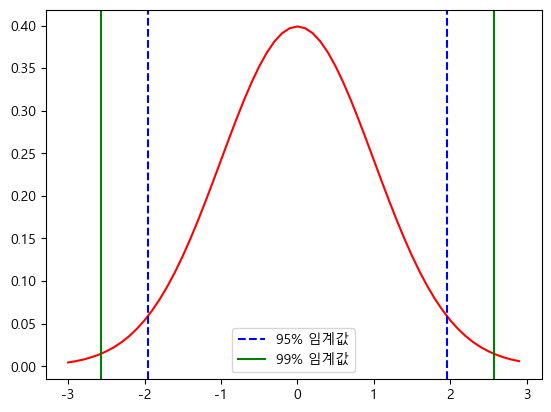

In [75]:
x_plot = np.arange(-3, 3, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot), color='red')   #표준정규분포

plt.axvline(th1, color='blue', linestyle='--', label='95% 임계값')  # 95%
plt.axvline(th2, color='blue', linestyle='--')

plt.axvline(th3, color='green', linestyle='-', label='99% 임계값')  # 99%
plt.axvline(th4, color='green', linestyle='-')

plt.legend()
plt.show()
# 신뢰수준이 높아지면 신뢰구간이 넓어짐 (임계값 사이의 간격이 커짐)
# 각 임계값 선 밖으로 나가면 귀무가설을 기각할 수 있음

- 검정통계량 z 값과 유의수준(α)에 따라서 임계값을 계산할 수 있습니다. 보통 α=0.05로 설정하여 유의수준이 5%일 때, 양측검정을 할 경우 임계값은 ±1.96이 됩니다.

- 만약 단측검정을 수행한다면, 유의수준(α)과 검정 방향에 따라서 임계값이 달라집니다. 예를 들어, 유의수준이 5%이고, 검정 방향이 오른쪽(대립가설: 평균 > 기준값)인 경우에는 임계값이 1.645가 됩니다.

- 따라서, 해당 코드에서는 양측검정을 수행하므로, 임계값은 ±1.96이 됩니다. 이를 코드로 나타내면 다음과 같습니다.

#### t검정 임계값
: t검정에서는 검정통계량(t-score)을 사용하여 가설검정을 수행합니다. 이때, 검정통계량은 t-분포를 따르므로, 유의수준(alpha)과 검정방향(양측or단측검정)에 따라 t-분포의 분위수를 사용하여 임계값을 결정

In [76]:
# z-score

# 모집단의 평균과 표준편차를 지정합니다
mu = 100
sigma = 10

# 표본데이터를 생성합니다
sample_size = 100
sample = np.random.normal(mu, sigma, sample_size)

# 표본 평균과 표준편차를 계산합니다
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# 검정통계량(z-score)과 유의확률(p값)을 계산합니다
z = (sample_mean - mu) / (sigma / np.sqrt(sample_size))
p_value = 1-norm.cdf(z)

print(f"검정통계량: {z}")
print(f"유의확률: {p_value}")

# 유의수준, 임계값
alpha = 0.05
cv = norm.ppf(alpha/2)
lower_bound = cv
upper_bound = -cv

print(f'유의수준: {alpha}')
print(f'임계값: {lower_bound, upper_bound}')

# 검정통계량이 크면 귀무가설을 기각할 가능성이 커짐
# 검정통계량이 커지면 유의확률은 감소(반비례 관계)

# 임계값 범위 내 z-score가 있으면 귀무가설을 기각할 수 없음
# 95% 임계값: -1.959963984540054, 1.9599639845400545
# p값이 0.05보다 크면 귀무가설을 기각할 수 없음

검정통계량: 0.6821395513375705
유의확률: 0.24757535670050357
유의수준: 0.05
임계값: (-1.9599639845400545, 1.9599639845400545)


In [77]:
# 모표준편차가 알려진 경우에는 보통 z-score를 사용하지만
# 샘플 수가 적은 경우에는 t-score를 사용하기도 함

# 모집단의 평균과 표준편차를 지정합니다
mu = 100
sigma = 10

# 표본데이터를 생성합니다
sample_size=20
sample = np.random.normal(mu, 10, sample_size)

# 표본 평균과 표준편차를 계산합니다
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# 검정통계량(t-score)과 유의확률을 계산합니다
t_score = (sample_mean - mu) / (sample_std / np.sqrt(sample_size))
p_value = 2 * (1-t.cdf(abs(t_score), df=sample_size-1))

print(f"검정통계량: {t_score}")
print(f"유의확률: {p_value}")

검정통계량: -0.5953259258292161
유의확률: 0.5586505166311433


In [78]:
# 양측검정
alpha = 0.05    # 유의수준
df = 19         # 자유도

t_crit1 = t.ppf(alpha/2, df)   # 양측검정의 하측 임계값 (isf와 상하 반대)
t_crit2 = t.ppf(1-alpha/2, df)   # 양측검정의 상측 임계값

print(f'임계값: {t_crit1}, {t_crit2}')

임계값: -2.0930240544082634, 2.093024054408263


In [79]:
# 우측단측 검정
alpha = 0.05    # 유의수준
df = 19         # 자유도

t_crit = t.ppf(1-alpha, df)

print(f'임계값: {t_crit}')
# 신뢰수준 95% -> 양쪽으로 나눠서 0.025씩이 아니라, 우측에만 5% 확률 몰빵

임계값: 1.729132811521367


#### p-value를 계산하고 검정을 수행하는 방법
t.cdf() 함수를 이용하여 t-분포의 누적분포함수(cumulative distribution function) 값을 계산합니다. 그리고 p-value는 양측검정 이므로, 계산된 누적분포함수 값에서 양쪽 꼬리 면적을 고려하여 2를 곱합니다.

계산된 p-value는 유의수준(alpha)와 비교하여 검정을 수행합니다. 만약 p-value가 alpha보다 작으면, 귀무가설을 기각하고 대 립가설을 채택합니다. 그 반대로, p-value가 alpha보다 크면, 귀무가설을 채택

In [80]:
# 모표준편차를 알고 있음 -> z-score사용 -> 그러나 표본 수가 적음 -> t-score사용

# 모집단의 평균과 표준편차를 지정합니다
mu = 100
sigma = 10

# 표본데이터를 생성합니다
sample_size=20
sample = np.random.normal(mu, sigma, sample_size)

# 표본 평균과 표준편차를 계산합니다
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
standard_error = sample_std / np.sqrt(sample_size)

# 검정통계량(t-score)을 계산합니다
t_score = (sample_mean - mu) / standard_error

# 유의수준, 검정방향, 자유도
alpha = 0.05    # 유의수준 0.05 = 95% 신뢰수준
tail = 'two'    # 검정 방향(양측검정)
df=sample_size-1    #자유도

# 임계값을 계산합니다
if tail=='two':
    t_crit = t.ppf(1-alpha/2, df=df)
else:
    t_crit = t.ppf(1-alpha, df=df)

# 검정결과 출력
if abs(t_score) >= t_crit:
    print(f"귀무가설 기각: 표본 평균과 모집단 평균은 유의하게 다릅니다")
else:
    print(f"귀무가설 채택: 표본 평균과 모집단 평균은 차이가 없습니다")

귀무가설 채택: 표본 평균과 모집단 평균은 차이가 없습니다


In [81]:
# p-value로 검정 수행

# 모집단의 평균과 표준편차를 지정합니다
mu = 100
sigma = 10

# 표본데이터를 생성합니다
sample_size=20
sample = np.random.normal(mu, sigma, sample_size)

# 표본 평균과 표준편차를 계산합니다
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
standard_error = sample_std / np.sqrt(sample_size)

# 검정통계량(t-score)을 계산합니다
t_score = (sample_mean - mu) / standard_error
p_value = 2 * (1 - t.cdf(abs(t_score), df=sample_size-1))

# 유의수준을 설정합니다
alpha = 0.05    # 95% 신뢰수준

# 검정결과 출력
if p_value <= alpha:
    print(f"귀무가설 기각: p-value는 {round(p_value,2)}이며, 표본 평균과 모집단 평균은 유의하게 다릅니다")
else:
    print(f"귀무가설 채택: p-value는 {round(p_value,2)}이며, 표본 평균과 모집단 평균은 차이가 없습니다")

귀무가설 채택: p-value는 0.75이며, 표본 평균과 모집단 평균은 차이가 없습니다


#### 귀무가설 대립가설
- 기각 대상이 되는 첫번째 가설을 귀무가설, 귀무가설과 대립되는 가설을 대립가설이라고 함
- 귀무가설이 기각된다면 즉 귀무가설이 틀렸다고 판단을 하면 유의미한 차이가 있다는 것임

- 귀무가설을 기각할 수 없다 = 대립가설이 통계적으로 유의미하지 않다.

#### p값(유의확률), 유의수준
- p값(유의확률) : 표본과 귀무가설 간의 모순을 나타내는 지표
    - p값이 작을수록 귀무가설과 표본이 모순된다고 판단
- 유의수준 : 귀무가설을 기각하는 기준이 되는 값
    - 유의수준은 위험률이라고 하며 5%를 사용하는 경우가 많음

#### 일표본(One-sample)이란,
통계적 추론에서 사용되는 용어 중 하나로, 분석하고자 하는 모집단으로부터 하나의 표본을 추출하여 해당 표본을 토대로 모집단의 특성을 추론하는 방법을 말합니다.

#### 일표본 t-검정

일표본 t-검정은 하나의 표본에 대해 평균이 특정 값과 다른지 검정하는 방법입니다. 가설검정의 절차는 다음과 같습니다.

- 귀무가설과 대립가설 설정
- 유의 수준 결정
- 검정통계량(t-값) 계산
- 임계값과 비교
- 검정결과 판단 및 결론 도출

In [82]:
# 일표본 t-검정 import numpy as np

# 샘플 데이터 생성
sample_data = np.array([10.8, 9.5, 11.2, 10.5, 11.3, 10.7, 10.9, 9.8, 11.0, 10.4])

# 귀무가설: 표본 평균은 10과 같다 
# 대립가설: 표본 평균은 10이 아니다

mu = 10    # 귀무가설에 따른 평균값
alpha = 0.05    # 유의 수준
sample_mean = np.mean(sample_data) # 표본평균
sample_std = np.std(sample_data, ddof=1) # 표본 표준편차
df = len(sample_data) - 1 # 자유도

t_value = (sample_mean - mu) / (sample_std / np.sqrt(len(sample_data))) # 검정통계량

t_crit1 = t.ppf(alpha/2, df)    # 임계값
t_crit2 = t.ppf(1-alpha/2, df)    # 임계값

p_value = t.sf(abs(t_value), df)*2    #p-value

# 결과 출력
print('표본평균:', sample_mean)
print('표본 표준편차:', sample_std)
print('t-값:', t_value)
print(f'임계값: {t_crit1}, {t_crit2}')
print('p-value:', p_value)
print()

if abs(t_value) > t_crit2:
    print('유의수준 {}에서 검정통계량은 임계값보다 크므로 귀무가설 기각'.format(alpha))
else:
    print('유의수준 {}에서 검정통계량이 임계값보다 작으므로 귀무가설을 기각할 수 없음'.format(alpha))

표본평균: 10.610000000000001
표본 표준편차: 0.5820461990063828
t-값: 3.3141516532462774
임계값: -2.262157162740992, 2.2621571627409915
p-value: 0.009024007157468749

유의수준 0.05에서 검정통계량은 임계값보다 크므로 귀무가설 기각


#### 대응표본 t-검정(Paired samples t-test) 
동일한 개체나 집단에서, 두 조건의 차이에 대한 검정 방법입니다. 
예를 들어, 특정 약의 효과를 검증하기 위해, 약을 복용하기 전과 후의 체온을 측정한 경우에 대응표본 t-검정을 사용할 수 있습니다.

In [112]:
pt_data = pd.read_csv('C:/Users/h/hmkd1/dataset/5_9_ptt.csv')
pt_data.head()

,person,medicine,body_temperature
0,A,before,36.2
1,B,before,36.2
2,C,before,35.3
3,D,before,36.1
4,E,before,36.1


In [113]:
pt_data.medicine.value_counts()

before    5
after     5
Name: medicine, dtype: int64

In [114]:
# query 함수로 boolean 인덱싱 하기
before = pt_data[pt_data['medicine']=='before'].body_temperature
after = pt_data.query('medicine=="after"').body_temperature

# 배열로 변환
before = np.array(before)
after = np.array(after)
diff = after-before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

In [116]:
# 평균값이 0과 다른지 검정 (단일표본 t-검정)
# 하나의 모집단에서 추출한 표본의 평균이 특정한 값과 같은지 검정

t, p = stats.ttest_1samp(diff,0)
print(f"t값: {t}")
print(f"p값: {p}")

# p값이 유의확률(0.05)보다 작으므로 귀무가설 기각, 대립가설이 통계적으로 유의미함을 확인

t값: 2.901693483620596
p값: 0.044043109730074276


In [115]:
# 대응표본 t-검정
# 동일한 개체나 집단에서 두 번의 측정을 한 결과

t, p = stats.ttest_rel(before, after)
print(f"t값: {t}")
print(f"p값: {p}")

t값: -2.901693483620596
p값: 0.044043109730074276


#### 독립표본 t-검정(Independent samples t-test)
두 개의 독립된 집단에서, 각 집단의 평균 차이가 유의한지를 검정하는 방법입니다. 예를 들어, 남자와 여자의 평균 키를 비교하는 경우에 독립표본 t-검정을 사용할 수 있습니다.

In [87]:
# 평균
mean_b = np.mean(before)
mean_a = np.mean(after)

#분산
sigma_b = np.var(before, ddof=1)
sigma_a = np.var(after, ddof=1)

#샘플사이즈
m = len(before)
n = len(after)

# t_score
t_score = (mean_a-mean_b) / np.sqrt((sigma_b/m + sigma_a/n))
t_score

3.1557282344421034

In [88]:
# equal_var=False: 분산이 다르다고 가정한 t검정(welch 검정)
t, p = stats.ttest_ind(after, before, equal_var=False)
print(f"t값: {t}")
print(f"p값: {p}")

# p값이 0.05보다 작으므로 귀무가설 기각x

t값: 3.1557282344421034
p값: 0.013484775682079892


#### 카이제곱 분포
- 분산분석이나 독립성 검정 등에서 사용되는 확률분포입니다. 카이제곱 분포는 자유도(degree of freedom)에 따라 모양이 달라지며, 자유도가 클수록 정규분포에 가까워집니다.

- 독립성 검정에서 카이스퀘어 분포를 사용하는 이유는 검정통계량으로서 카이스퀘어 검정통계량을 사용하기 때문입니다.

- 독립성 검정은 두 범주형 변수 간의 관련성을 검정하는 방법입니다. 예를 들어, 성별과 흡연 여부라는 두 가지 범주형 변수가 있을 때, 이 두 변수 간에는 관련성이 있는지 없는지를 검정하는 것입니다.

- 카이스퀘어 검정통계량은 범주형 변수 간의 관련성을 검정하는 데 사용되며, 관측된 빈도와 기대 빈도 간의 차이를 이용하여 검정통계량을 계산합니다. 검정통계량은 카이스퀘어 분포를 따르므로, 카이스퀘어 분포를 이용하여 유의확률을 계산합니다. 이 때, 검정통계량이 카이스퀘어 분포를 따르는 것은 큰 표본에서는 중심극한정리에 의해, 작은 표본에서는 피셔의 정확 검정에 의해 유도됩니다.

- 따라서, 독립성 검정에서 카이스퀘어 분포를 사용하는 이유는, 검정통계량으로서 카이스퀘어 검정통계량을 사용하기 때문입니다. 이를 통해, 범주형 변수 간의 관련성을 검정할 때 적절한 검정통계량을 사용할 수 있으며, 이를 기반으로 유의확률을 계산하여 검정 결과를 도출할 수 있습니다.

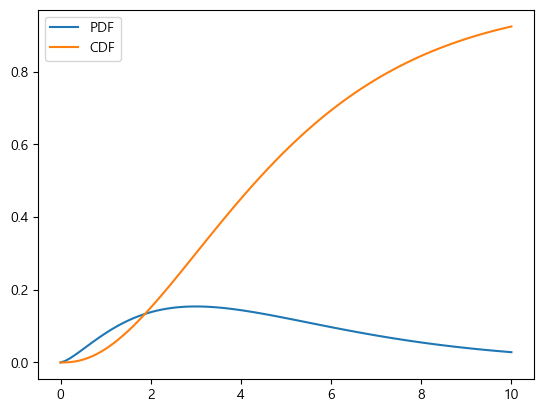

In [89]:
x = np.linspace(0,10, 100)
df = 5

# 카이제곱 분포의 확률밀도함수 그래프
pdf = chi2.pdf(x, df)

# 카이제곱 분포의 누적분포함수 그래프
cdf = chi2.cdf(x, df)

plt.plot(x, pdf, label='PDF')
plt.plot(x, cdf, label='CDF')
plt.legend()
plt.show()

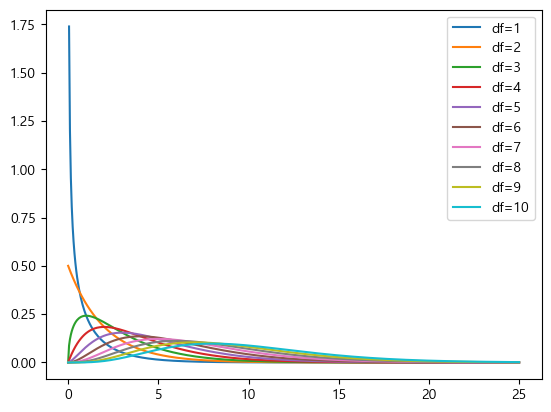

In [90]:
# 자유도가 0~10일때 카이제곱분포의 확률밀도함수 그래프 변화

# 자유도 범위와 간격
df_range = range(1, 11)
df_step = 1

# x값 범위와 간격
x_range = np.linspace(0, 25, 500)
x_step = x_range[1] - x_range[0]

# 자유도가 각각의 값일 때의 확률밀도함수 그래프 그리기
for df in df_range:
    pdf = chi2.pdf(x_range, df)
    plt.plot(x_range, pdf, label=f'df={df}')

plt.legend()
plt.show()

#### 독립성 검정
- 독립성 검정은 두 개의 범주형 변수 간의 상관 관계를 검정하는 방법입니다. 독립성 검정에서는 >>> 귀무가설로 두 변수가 서로 독립적이라는 가정 <<<을 놓고, 대립가설로 두 변수가 서로 상관 관계가 있다는 가정을 놓습니다. 검정 결과로는 유의확률이 출력되며, 유의확률이 유의수준보다 작을 경우 귀무가설을 기각하고 대립가설을 채택합니다.

- 독립성 검정에서는 검정통계량으로 카이제곱 검정통계량을 사용합니다. 검정통계량을 계산하기 위해 교차표(cross table)을 생성하고, 이를 바탕으로 관측값과 기대값의 차이를 계산합니다. 교차표는 각 범주형 변수의 카테고리를 축으로 하는 표입니다. 예를 들어, 성별과 흡연 여부라는 두 범주형 변수 간의 독립성을 검정하는 경우, 교차표는 성별을 행으로, 흡연 여부를 열로 나열한 표입니다.

- 검정 결과로는 검정통계량과 유의확률이 출력되며, 유의확률이 유의수준보다 작으면 귀무가설을 기각하고 대립가설을 채택합니다. 따라서, 독립성 검정 결과를 해석할 때에는 유의수준을 고려하여 검정 결과를 해석해야 합니다.

(한줄요약)
- 독립성검정 독립인지, 상관관계가 있는지 확인
- 유의확률이 유의수준보다 작을 경우 상관관계가 있다고 봄

In [91]:
chi2_contingency

<function scipy.stats.contingency.chi2_contingency(observed, correction=True, lambda_=None)>

In [92]:
# 교차표 생성
observed = [[10,20],[30,40]]

# 카이제곱 검정 실행
chi2_stat, p_value, df, expected = chi2_contingency(observed)

print(f'카이제곱 검정 통계량: {chi2_stat}')
print(f'p값: {p_value}')
print(f'자유도: {df}')
print(f'기대빈도: {expected}')

# 유의확률이 유의수준보다 높으므로 기무기설 기각x -> 상관관계가 없다고 봄

카이제곱 검정 통계량: 0.4464285714285714
p값: 0.5040358664525046
자유도: 1
기대빈도: [[12. 18.]
 [28. 42.]]


In [93]:
click_data = pd.read_csv('../dataset/5_10_cd.csv')
click_data

,color,click,freq
0,blue,click,20
1,blue,not,230
2,red,click,10
3,red,not,40


In [94]:
# 분할표
cross = pd.pivot_table(data=click_data, values='freq', aggfunc='sum', index='color', columns='click')
cross

click,click,not
color,,
blue,20,230
red,10,40


In [95]:
a = stats.chi2_contingency(cross, correction=False)   # correction=False: 보정 안함

print(f'카이제곱 검정 통계량: {a[0]}')
print(f'p값: {a[1]}')
print(f'자유도: {a[2]}')
print(f'기대도수표: {a[3]}')

# p값이 0.05 이하이므로 기무가설 기각o -> 두 변수의 상관관계가 있다고 봄

카이제곱 검정 통계량: 6.666666666666666
p값: 0.009823274507519247
자유도: 1
기대도수표: [[ 25. 225.]
 [  5.  45.]]


#### 과제(1): 다음 사례에서 두 가지 신약의 효과를 비교하기 위하여 t검정을 수행하세요.
- 어떤 연구자가 두 가지 신약의 효과를 비교하고자 할 때, 두 신약을 각각 10명의 환자에게 투여하고 그 결과를 비교하였다.
 <br>
 
X1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12] <br>
X2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11] <br>
유의수준 0.05 <br>


- 귀무가설 : 두 신약의 효과는 차이가 없다(두 집단의 평균값이 같다)
    - 반박하려는 가설
- 대립가설 : 두 신약의 효과는 차이가 있다(두 집단의 평균값의 차이는 0이 아니다)
    - 반박을 통해 증명하려는 가설
    
#### 과제(2): 위 사례에서 두 가지 신약의 효과를 비교하기 위하여 p값으로 검정을 수행하세요.

In [96]:
# 두 개의 그룹끼리 차이 검정을 할 때 -> t-검정 사용
import numpy as np
from scipy.stats import t

# x1과 x2의 데이터를 입력합니다.
x1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
x2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# 각 집단의 평균값과 표준편차를 계산합니다.
mean1 = np.mean(x1)
mean2 = np.mean(x2)
std1 = np.std(x1)
std2 = np.std(x2)

# 자유도
df1 = len(x2)-1
df2 = len(x2)-1

# 표준오차
st1 = std1 / np.sqrt(len(x1))
st2 = std2 / np.sqrt(len(x2))

# 합동 표준편차 (pooled_std)
dof = df1 + df2
pooled_std = np.sqrt((df1*std1**2 + df2*std2**2) / dof)

# t-검정
t_score1 = (mean1 - mean2) / ((st1**2 + st2**2)**0.5)
t_score2 = (mean1 - mean2) / (pooled_std * np.sqrt(1/len(x1) + 1/len(x2)))

# 유의수준을 0.05로 설정하고, 양측 검정을 수행합니다.
alpha = 0.05           # 유의수준

t_crit1 = t.ppf(alpha/2, df)   # 양측검정의 하측 임계값
t_crit2 = t.ppf(1-alpha/2, df)   # 양측검정의 상측 임계값

p_value = t.sf(abs(t_score), df)*2    # p-value

# 검정 결과 출력
print(f"검정통계량1: {t_score1}")     # t-검정
print(f"검정통계량2: {t_score2}")     # t-검정
print(f"유의확률: {p_value}")       # p-검정
print(f'임계값: {t_crit1}, {t_crit2}')
print()

# 검정통계량이 임계값 사이에 있으므로 귀무가설을 기각할 수 없음(귀무가설 채택)
if (t_score1 >= t_crit1) & (t_score1 <= t_crit2):
    print("검정통계량(t_score)이 임계값 사이에 있으므로 귀무가설을 기각할 수 없습니다.")
else:
     print("검정통계량(t_score)이 임계값을 벗어났으므로 귀무가설을 기각하고 대립가설을 채택할 수 있습니다.")

# 유의확률이 유의수준보다 크므로 귀무가설을 기각할 수 없음
# 만약 p(유의확률)값이 유의수준(0.05)보다 작으면, 귀무가설을 기각하고 대립가설을 채택할 수 있음
if p_value >= alpha:
    print(f"유의확률(p_value)이 유의수준 {alpha}보다 크므로 귀무가설을 기각할 수 없습니다.")
else:
    print(f"유의확률(p_value)이 유의수준 {alpha}보다 작으므로 귀무가설을 기각하고 대립가설을 채택할 수 있습니다.")

검정통계량1: 0.778498944161523
검정통계량2: 0.778498944161523
유의확률: 0.19536198892088888
임계값: -12.706204736432102, 12.706204736432095

검정통계량(t_score)이 임계값 사이에 있으므로 귀무가설을 기각할 수 없습니다.
유의확률(p_value)이 유의수준 0.05보다 크므로 귀무가설을 기각할 수 없습니다.


In [97]:
from scipy.stats import ttest_ind
# t값과 p값 한 번에 구하는 함수

X1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
X2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

t_score, p_value = ttest_ind(X1, X2)    # t-검정 함수: 검정 통계량(t-value), p-value를 반환
print(f"검정통계량: {t_score}")
print(f"유의확률: {p_value}")

검정통계량: 0.7385489458759963
유의확률: 0.4697020728008009


#### 과제(1): t분포 확률밀도 함수를 그래프로 그리고 그 위에 t_value와 임계값을 vline으로 표시하세요

t-값: 3.3141516532462774
임계값: -2.262157162740992, 2.262157162740992
p-value: 0.009024007157468749


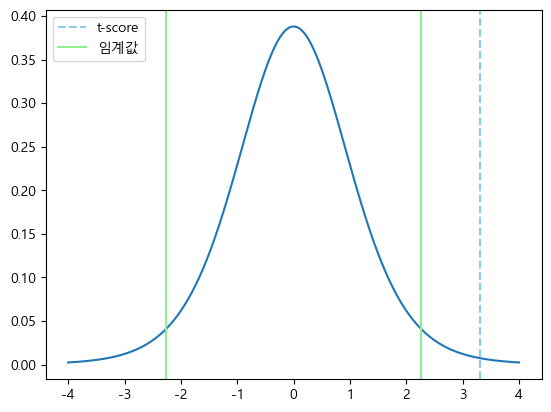

In [106]:
# 샘플 데이터 생성
sample_data = np.array([10.8, 9.5, 11.2, 10.5, 11.3, 10.7, 10.9, 9.8, 11.0, 10.4])

mu = 10    # 귀무가설에 따른 평균값
alpha = 0.05    # 유의 수준
sample_mean = np.mean(sample_data) # 표본평균
sample_std = np.std(sample_data, ddof=1) # 표본 표준편차
df = len(sample_data) - 1 # 자유도

t_crit1 = t.ppf(alpha/2, df)    # 임계값
t_crit2 = -t_crit1

t_value = (sample_mean - mu) / (sample_std / np.sqrt(len(sample_data))) # 검정통계량
p_value = t.sf(abs(t_value), df)*2    #p-value

# 결과 출력
print('t-값:', t_value)
print(f'임계값: {t_crit1}, {t_crit2}')
print('p-value:', p_value)

# 위 t-검정에 대한 그래프
x=np.linspace(-4, 4, 10000)
y=t.pdf(x,df)      # t(df).pdf(x) 이렇게 써도ok

plt.plot(x,y)
plt.axvline(t_value, linestyle='--', label='t-score', color='skyblue')

plt.axvline(t_crit1, linestyle='-', label='임계값', color='lightgreen')
plt.axvline(t_crit2, linestyle='-', color='lightgreen')

plt.legend()
plt.show()

#### 과제(2): 동일한 집단에 대해서 약 복용 전후로 체온의 변화가 있는지에 대한 유의성 검정 수행
- 약 복용 전 체온 데이터 : [36.2, 36.1, 36.5, 36.3, 36.2, 36.4, 36.3, 36.1, 36.6, 36.2]
- 약 복용 후 체온 데이터 : [36.5, 36.3, 36.8, 36.6, 36.5, 36.7, 36.6, 36.2, 36.9, 36.4]

In [126]:
before = np.array([36.2, 36.1, 36.5, 36.3, 36.2, 36.4, 36.3, 36.1, 36.6, 36.2])
after = np.array([36.5, 36.3, 36.8, 36.6, 36.5, 36.7, 36.6, 36.2, 36.9, 36.4])

# 동일한 집단 내 약 복용 전후차이 이므로, 대응표본 t-검정 사용
t, p = stats.ttest_rel(before, after)
print(f"t값: {t}")
print(f"p값: {p}")

# p값이 0.05보다 작으므로 귀무가설 기각 -> 대립가설이 통계적으로 유의미한 결과를 가짐

t값: -11.758942438532666
p값: 9.15111121564323e-07


#### 과제(3): 남자와 여자 두 그룹에 대해서 평균 키의 차이가 있는지에 대한 유의성 검정을 수행하세요.
- 남자의 키 데이터 : [172, 174, 176, 178, 180, 182, 184, 186, 188, 190]
- 여자의 키 데이터 : [156, 158, 160, 162, 164, 166, 168, 170, 172, 174]

In [120]:
man = np.array([172, 174, 176, 178, 180, 182, 184, 186, 188, 190])
woman = np.array([156, 158, 160, 162, 164, 166, 168, 170, 172, 174])

mean1 = man.mean()
mean2 = woman.mean()

sigma1 = np.var(man, ddof=1)
sigma2 = np.var(woman, ddof=1)

m = len(man)
w = len(woman)

t_score = (mean2-mean1) / np.sqrt(sigma1/m + sigma2/w)   # t값 계산하는 방법1
t,p = stats.ttest_ind(man, woman, equal_var=False)    # 방법2

print(f"t-score: {t_score}")
print(f"t값: {t}")
print(f"p값: {p}")
# p값이 0.05보다 작으므로 귀무가설 기각 -> 대립가설이 통계적으로 유의미한 결과를 가짐

t-score: -5.908391567007971
t값: 5.90839156700797
p값: 1.3603112478171794e-05


#### 과제(4): 아래 df에서 gender와 purchase간 독립성 검정을 수행하고 결과 기술
- 귀무가설로 두 변수가 서로 독립적이라는 가정

In [127]:
# 데이터 프레임 생성
data = {'gender': ['M', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'M'], 'purchase': ['yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes']}
df = pd.DataFrame(data)
df.head()

# 분할표
a = df.value_counts()
observed = [a[1],a[3]],[a[2],a[0]]   # F-N, F-Y, M-N, M-Y

table = pd.crosstab(df['gender'], df['purchase'])    #이렇게 하면 한 방에 만들 수 있음

# 카이제곱 검정
chi, p, dof, expected = chi2_contingency(observed)

print(f'카이제곱 검정 통계량: {chi}')
print(f'p값: {p}')
print(f'자유도: {dof}')
print(f'기대빈도: {expected}')

table

# p값이 0.05보다 크므로 귀무가설 기각x

카이제곱 검정 통계량: 0.41666666666666663
p값: 0.5186050164287255
자유도: 1
기대빈도: [[2. 2.]
 [3. 3.]]


purchase,no,yes
gender,,
F,3,1
M,2,4
